In [236]:
%matplotlib inline
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from random import uniform, seed


In [237]:
N = 10
SIZE = N * N
# occupied & free places in percentages
OCCUPIED = 0.45 
FREE = 0.1


In [238]:
array = np.zeros(SIZE, dtype=np.int8)
"""
BLUE is 0
RED  is 1
FREE is -1
"""
# Brilliant way to fill array
array[:int(SIZE*OCCUPIED)] = 1
array[-int(SIZE*FREE):] = -1
np.random.shuffle(array)

# Brilliant way to convert linear array to matrix
# matrix = array.reshape(N,N)

C:\Users\nabie\AppData\Local\Temp\ipykernel_3160\3768844817.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(x = 1, y = 1, vmax=N, vmin=0, marker='s')


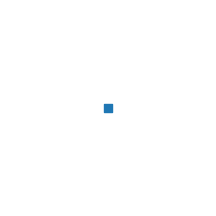

In [239]:
fig, ax = plt.subplots()

ax.scatter(x = 1, y = 1, vmax=N, vmin=0, marker='s')
ax.set_axis_off()
plt.grid(False)
plt.show()